## Credit Card Fraud Detection Data Set

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, make_scorer

In [2]:
## Data Loding to Pandas DataFrame
cCard_df = pd.read_csv("creditcard.csv")
cCard_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
#cCard_df.describe()

In [3]:
#ncCard = cCard_df[cCard_df['Class']==0].sample(n=250000, replace=True, random_state=40)
#pcCard = cCard_df[cCard_df['Class']==1].sample(n=400)
#cCard_df = pd.concat([ncCard,pcCard])

In [3]:
#Assigning the data, Perform Train Test Split
X = cCard_df.iloc[:,:-1]
y = cCard_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler
mMS = MinMaxScaler()
mMS.fit(X_train)
X_train = mMS.transform(X_train)
X_test = mMS.transform(X_test)

In [97]:
dt = DecisionTreeClassifier()

In [98]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [99]:
cvScores = cross_val_score(dt, cv=5, X=X_train, y=y_train, scoring='f1_macro').mean()

In [100]:
print(cvScores)

0.879045851989779


In [101]:
train_prediction = dt.predict(X_train)
test_prediction = dt.predict(X_test)

In [102]:
f1_score(y_train, train_prediction)

1.0

In [103]:
f1_score(y_test, test_prediction)

0.75

In [86]:
dt_hyp = DecisionTreeClassifier()

In [87]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 5, 6, 8],
    'max_leaf_nodes': [6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [1, 2, 4, 5, 6]
}

score = make_scorer(f1_score)

In [90]:
dt_RsCV = RandomizedSearchCV(dt_hyp, param_distributions=params, scoring=score)

In [91]:
dt_RsCV.fit(X_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='b

In [93]:
dt_best = dt_RsCV.best_estimator_

In [95]:
cvS_dt_best = cross_val_score(dt_best, cv=5, X=X_train, y=y_train, scoring='f1_macro')

In [96]:
cvS_dt_best.mean()

0.9054166469889481

In [115]:
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [116]:
best_train_predictions = dt_best.predict(X_train)
best_test_predictions = dt_best.predict(X_test)

In [117]:
best_test_prediction_pro = dt_best.predict_proba(X_test)[::,1]

In [118]:
f1_score(y_train, best_train_predictions)

0.8388969521044993

In [119]:
f1_score(y_test, best_test_predictions)

0.8190476190476191

In [120]:
rf = RandomForestClassifier()

In [121]:
rfCV = cross_val_score(rf, X=X_train, y=y_train, cv=5, scoring='f1_macro')

In [122]:
rfCV.mean()

0.9175751772188484

In [123]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
train_rf_prediction = rf.predict(X_train)

In [125]:
test_rf_prediction = rf.predict(X_test)

In [126]:
f1_score(y_train, train_rf_prediction)

0.983957219251337

In [127]:
f1_score(y_test, test_rf_prediction)

0.8292682926829267

In [128]:
rf_hyp = RandomForestClassifier()

In [129]:
rf_params = {
    'n_estimators': [10, 15, 20, 25, 30],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 5, 6, 8],
    'max_leaf_nodes': [6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [1, 2, 4, 5, 6]
}

score_rf = make_scorer(f1_score)

In [130]:
rf_rsCV = RandomizedSearchCV(rf_hyp, param_distributions=rf_params, scoring=score_rf)

In [131]:
rf_rsCV.fit(X_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [133]:
rf_best_estimator = rf_rsCV.best_estimator_

In [158]:
rfCVScores = cross_val_score(rf_best_estimator, cv=5, X=X_train, y=y_train, scoring='f1_macro')
rfCVScores.mean()

0.9094027298132769

In [159]:
rf_best_estimator.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=14,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [143]:
train_rf_best_prediction = rf_best_estimator.predict(X_train)
test_rf_best_prediction = rf_best_estimator.predict(X_test)

In [144]:
f1_score(y_train, train_rf_best_prediction)

0.8392603129445235

In [145]:
f1_score(y_test, test_rf_best_prediction)

0.8093023255813954

In [18]:
models = {
           #'LR': LogisticRegression(), 
          #'DTR': DecisionTreeClassifier(), 
          #'RFS': RandomForestClassifier(), 
          #'ADB': AdaBoostClassifier(),
            'svM': SVC(probability=True)
         }




Model Name:  svM
ConfusionMatrix: 
 [[71075    14]
 [   46    67]]
TrainAcc: ====> 0.999105826174481
TestAccuracy : ====> 0.9991573270413753
recall: ====> 0.5929203539823009
Precision: ====> 0.8271604938271605
F1Score: ====> 0.6907216494845362
AUC: ====> 0.9667210129344284


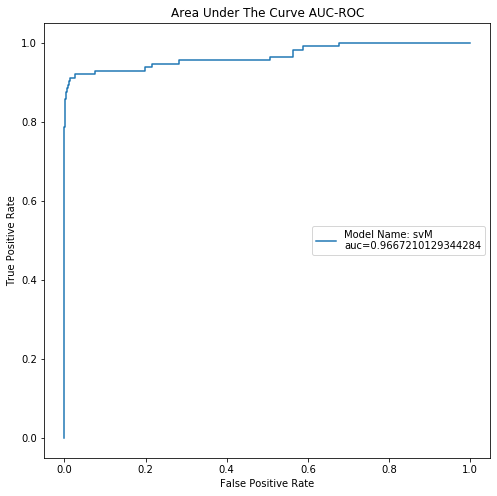

In [19]:
for mName, model in models.items():
    obj = models[mName]
    obj.fit(X_train, y_train)
    y_predict = obj.predict(X_test)
    y_predict_proba = obj.predict_proba(X_test)[::,1]
    
    train_acc = obj.score(X_train, y_train)
    test_acc =  obj.score(X_test, y_test)
    
    recallScore = recall_score(y_test, y_predict)
    precisionScore = precision_score(y_test, y_predict)
    
    f1Score = f1_score(y_test, y_predict)
    auc = roc_auc_score(y_test, y_predict_proba)
    fpr, tpr, thrshould = roc_curve(y_test, y_predict_proba)
       
   
    print("\n\n")
    print("Model Name: ", mName)
    print("ConfusionMatrix: \n", confusion_matrix(y_test, y_predict))
    print("TrainAcc: ====> {}".format(train_acc))
    print("TestAccuracy : ====> {}".format(test_acc))
    print("recall: ====> {}".format(recallScore))
    print("Precision: ====> {}".format(precisionScore))
    print("F1Score: ====> {}".format(f1Score))
    print("AUC: ====> {}".format(auc))

  
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label="Model Name: "+mName+"\n"+"auc="+str(auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Area Under The Curve AUC-ROC')

    plt.legend(loc= 7)
    plt.show()